# Data Augmentation
In diesem Notebook behandeln wir die Datenerweiterung bei Bildern. Die Codes stammen aus dem Buch von Chollet (2018)

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

2023-04-18 15:02:00.299960: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-18 15:02:00.303152: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 15:02:00.349858: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 15:02:00.351522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 15:02:00.894642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

'module://matplotlib_inline.backend_inline'

## Data Path

In [2]:
original_dataset_dir = '../data/train'

base_dir = '../data/cats_and_dogs_2k/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

## Data Gathering with Generator

### Data Augmentation

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                                                                rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True
                                                             )

### Data Preparation

In [4]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Model building

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu',
                                 input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation= 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


2023-04-18 15:02:02.126889: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Model Compile

In [6]:
model.compile(loss = 'binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Fit Model

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch= 100,
    epochs = 100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100


/tmp/ipykernel_1637543/2045796954.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2023-04-18 15:02:02.621368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 0.6959 - acc: 0.4915

2023-04-18 15:02:14.071829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 13s 123ms/step - loss: 0.6959 - acc: 0.4915 - val_loss: 0.6957 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 12s 124ms/step - loss: 0.6919 - acc: 0.5205 - val_loss: 0.7085 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6879 - acc: 0.5440 - val_loss: 0.6738 - val_acc: 0.5850
Epoch 4/100
100/100 [==============================] - 13s 128ms/step - loss: 0.6787 - acc: 0.5660 - val_loss: 0.6608 - val_acc: 0.5870
Epoch 5/100
100/100 [==============================] - 12s 124ms/step - loss: 0.6728 - acc: 0.5795 - val_loss: 0.6613 - val_acc: 0.5820
Epoch 6/100
100/100 [==============================] - 13s 127ms/step - loss: 0.6667 - acc: 0.5805 - val_loss: 0.6705 - val_acc: 0.5690
Epoch 7/100
100/100 [==============================] - 13s 127ms/step - loss: 0.6611 - acc: 0.5890 - val_loss: 0.6444 - val_acc: 0.6260
Epoch 8/100
100/100 [==============================] - 13s 1

## Model Evaluation

<Figure size 640x480 with 0 Axes>

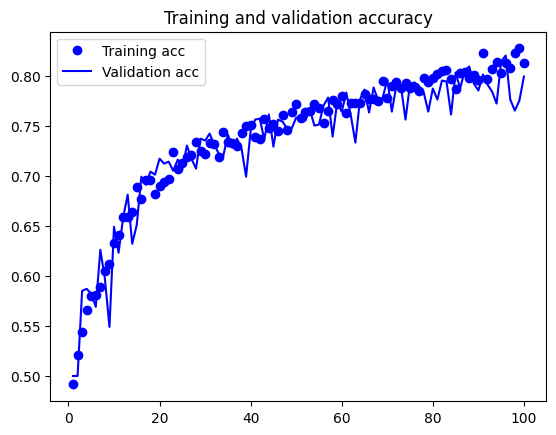

<Figure size 640x480 with 0 Axes>

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

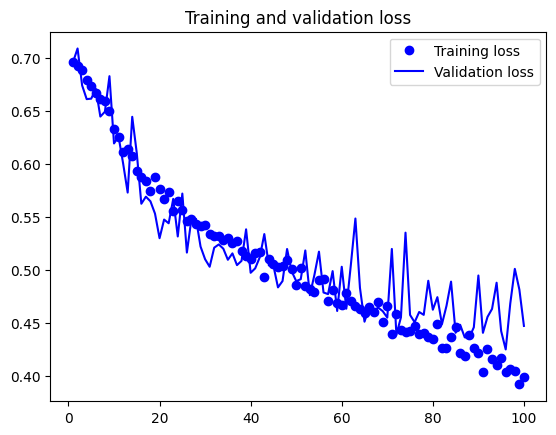

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

## Model Save

In [10]:
model.save('cats_and_dogs_2k.h5')

## REFERENCES
Francois Chollet (2018), Deep Learning with Keras, Manning.